In this turtorial we will be training the simple feed foward network on MNIST datasets. At the end we will be visualising the predicted result using matplotlib.

In [1]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [2]:
import tensorflow as tf
import datetime
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline

2022-10-20 22:58:01.777740: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-20 22:58:01.853576: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-20 22:58:01.871691: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-20 22:58:02.282955: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

In [3]:

##downloading the datasets
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
##Normalising the datasets
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
## Creating sequential model to train the mnist datasets
def create_model():
    return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

In [5]:
model = create_model()
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model.fit(x=x_train, 
        y=y_train, 
        epochs=5, 
        validation_data=(x_test, y_test), 
        callbacks=[tensorboard_callback])

2022-10-20 22:58:04.986961: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-20 22:58:05.005819: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-20 22:58:05.006032: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-20 22:58:05.006529: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compi

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2203 - accuracy: 0.9359 - val_loss: 0.1056 - val_accuracy: 0.9674
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0965 - accuracy: 0.9701 - val_loss: 0.0812 - val_accuracy: 0.9743
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0691 - accuracy: 0.9789 - val_loss: 0.0711 - val_accuracy: 0.9783
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0544 - accuracy: 0.9826 - val_loss: 0.0719 - val_accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0418 - accuracy: 0.9863 - val_loss: 0.0660 - val_accuracy: 0.9806


1/1 [==============================] - 0s 12ms/step


Text(0.5, 1.0, 'ground_truth: 0 || predicted : 0')

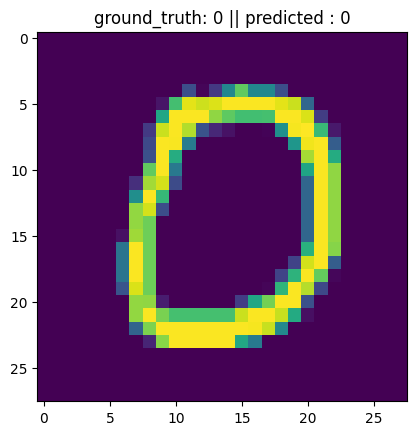

In [9]:
predicted=np.argmax(model.predict(x_test[10].reshape(-1,28,28)))
ground_truth=y_test[10]

plt.imshow(x_test[10])
plt.title('ground_truth: {} || predicted : {}'.format(ground_truth,predicted))

In [10]:
!tensorboard --logdir='logs/'

2022-10-20 23:00:56.395636: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-20 23:00:56.463336: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-20 23:00:56.481256: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-20 23:00:56.782658: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li